In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ACTDR
import netCDF4 as nc
from salishsea_tools import viz_tools
import numpy as np
import datetime
from salishsea_tools import tidetools

import comparisons

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
paths = {'nowcast': '/results/SalishSea/nowcast/',
        'spinup': '/results/SalishSea/spin-up/'}

In [4]:
ACTDR.load_dat('SOG_2000.dat')

('> open ', 'SOG_2000.dat')
> load CTD_DAT
> load STANDARD_KEYS
('> close ', 'SOG_2000.dat')
> complete


In [5]:
data = pd.DataFrame(ACTDR.CTD_DAT)

In [6]:

data_fall = data[(data.Year>=2014) & (data.Month >=10)  ]

/home/nsoontie/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<matplotlib.contour.QuadContourSet instance at 0x7f866621cef0>

/home/nsoontie/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


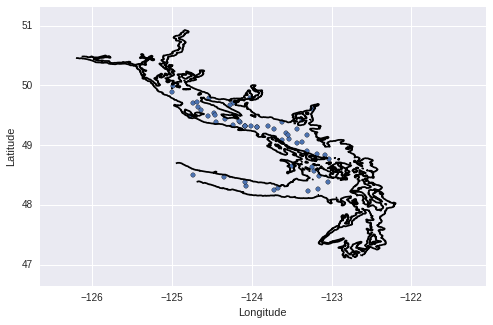

In [7]:

fig,axm = plt.subplots(1,figsize=(8,5))
data_fall.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f866a857a90>]], dtype=object)

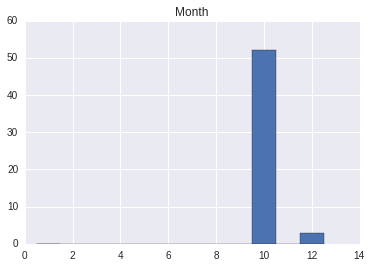

In [8]:
data_fall.hist('Month',bins=np.arange(0.5,13.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8667b7b4d0>]], dtype=object)

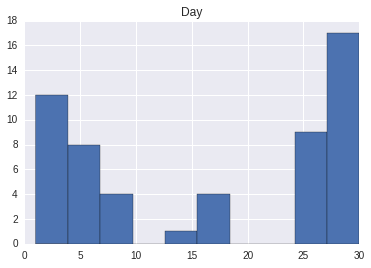

In [9]:
data_fall.hist('Day')

## Southern Strait of Georgia

In [10]:
lon_min=-124
lon_max=-123
lat_min=48.7
lat_max=49.3
data_SOG  = comparisons.isolate_region(data_fall,lon_min, lon_max, lat_min, lat_max)

No model data for 1/10
No model data for 1/10
No model data for 2/10
No model data for 2/10
No model data for 3/10
No model data for 3/10
No model data for 2/10
No model data for 3/10


/data/nsoontie/MEOPAR/tools/SalishSeaTools/salishsea_tools/nowcast/analyze.py:169: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


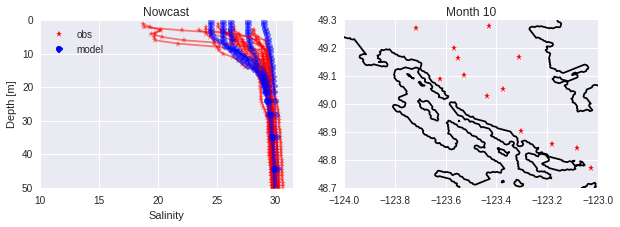

In [11]:
zmax= 50
grouped = data_SOG.groupby('Month')
model_year=2014
for month in grouped.groups.keys():
    fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_SOG,paths['nowcast'],zmax=zmax,vmin=10,
                                        vmax=31.5, xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

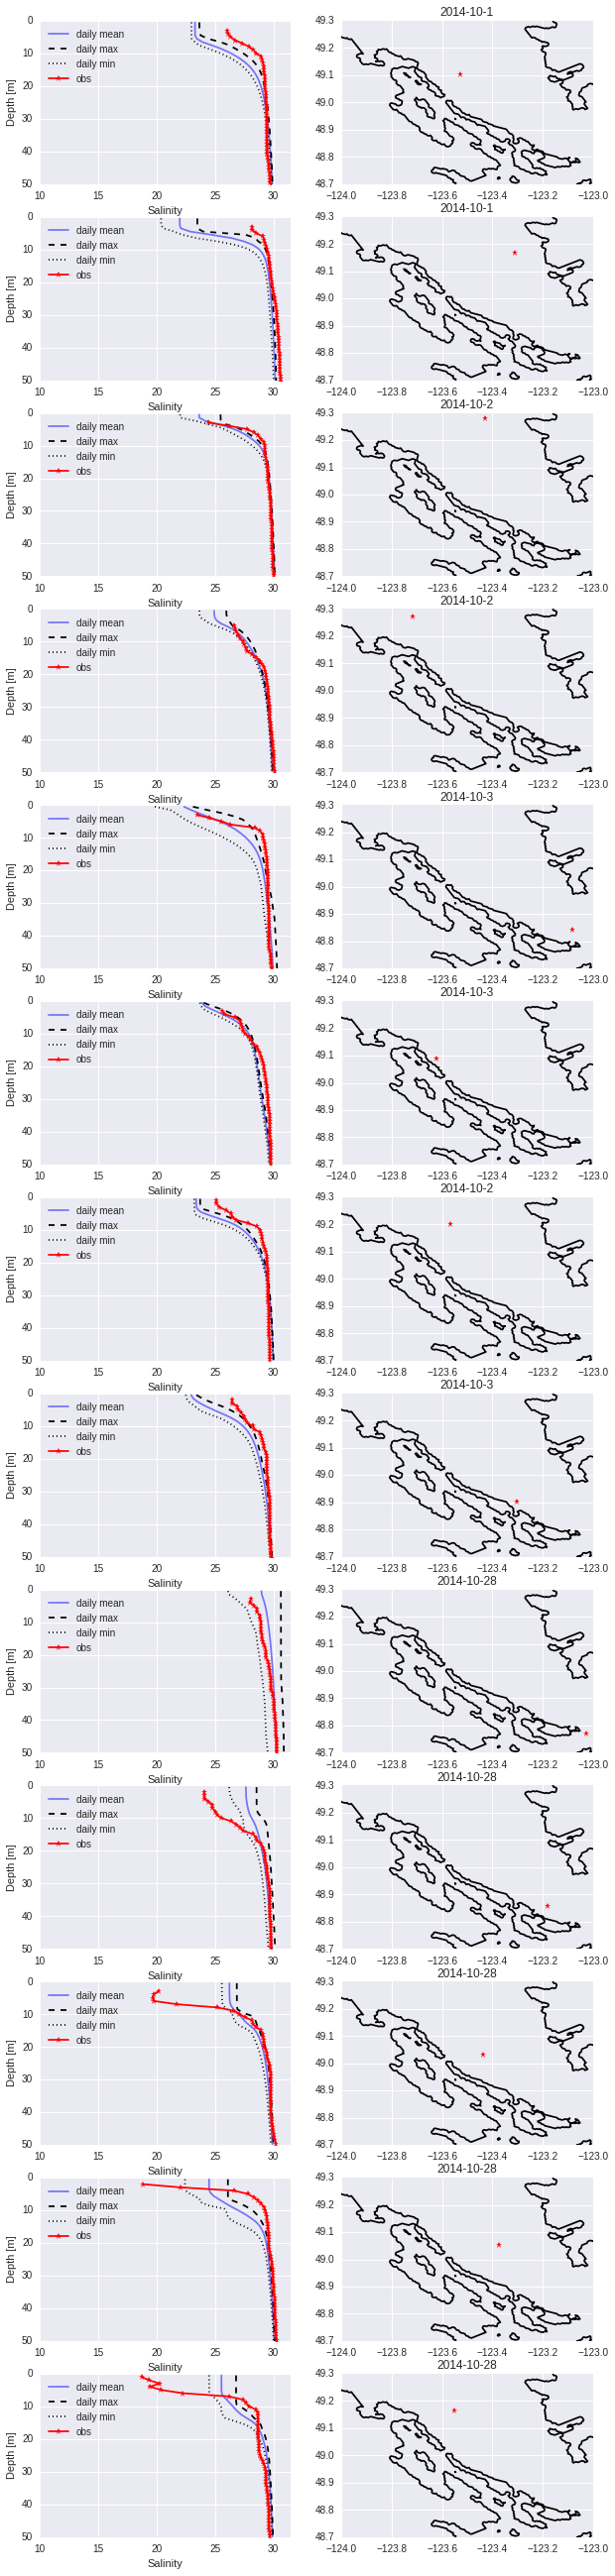

In [12]:
month=10
fig=comparisons.compare_cast_hourly(month,2014,'Salinity',data_SOG,paths['nowcast'],zmax=zmax,vmin=10,vmax=31.5,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

In late October, most of the surface water in the southern Strait of Georgia is too salty.


##Strait of Georgia North

In [13]:
lon_min=-125.1
lon_max=-123
lat_min=49.3
lat_max=50
data_SOGN  = comparisons.isolate_region(data_fall,lon_min, lon_max, lat_min, lat_max)

No model data for 1/10
No model data for 4/10
No model data for 4/10
No model data for 5/10
No model data for 5/10
No model data for 5/10
No model data for 5/10
No model data for 6/10
No model data for 7/10
No model data for 7/10
No model data for 8/10
No model data for 8/10
No model data for 1/10
No model data for 2/10
No model data for 15/10


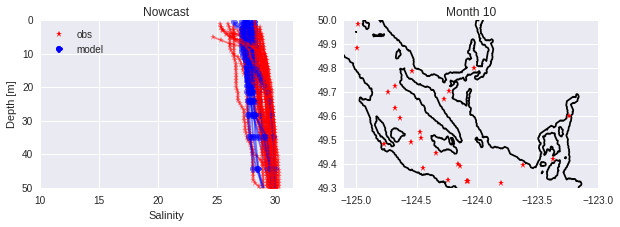

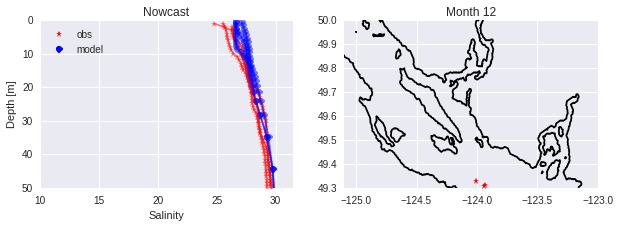

In [14]:
zmax= 50
grouped = data_SOGN.groupby('Month')
model_year=2014
for month in grouped.groups.keys():
    fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_SOGN,paths['nowcast'],zmax=zmax,vmin=10,
                                        vmax=31.5, xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

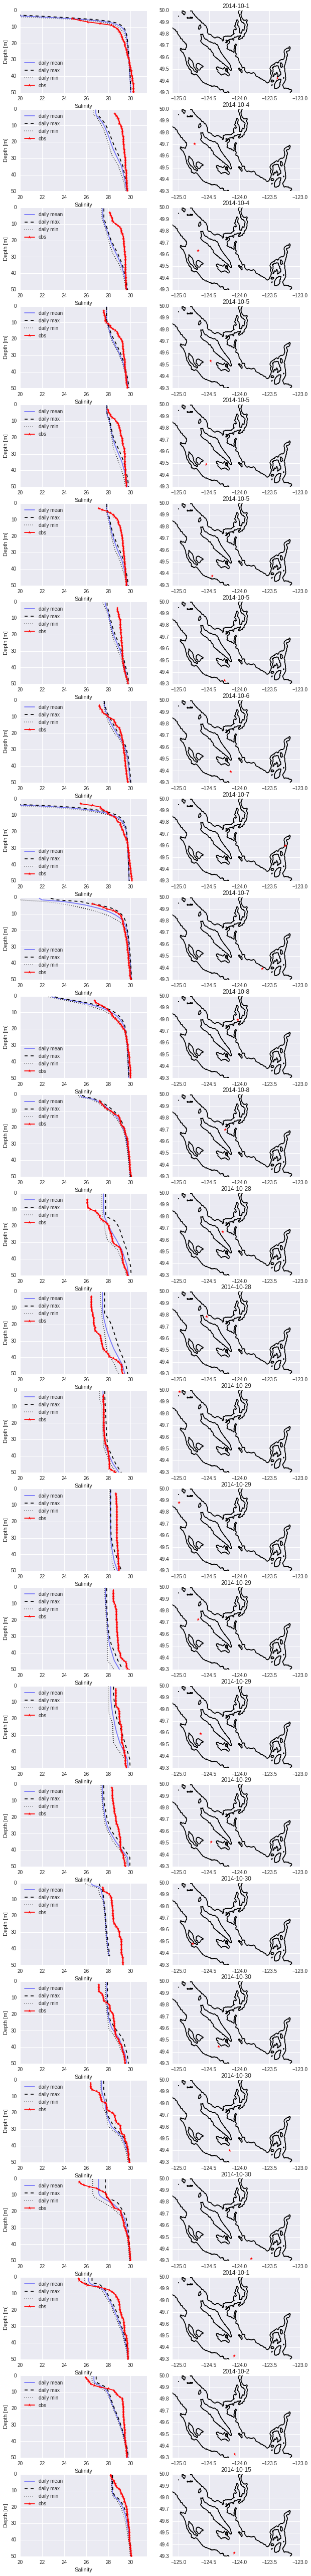

In [15]:
month = 10
fig=comparisons.compare_cast_hourly(month,2014,'Salinity',data_SOGN,paths['nowcast'],zmax=zmax,vmin=20,vmax=31.5,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

* East of Texada Isalnd is too salty in the surface
* Very north is too fresh in the surface. As we go furter south, we start to get too salty in the surface.

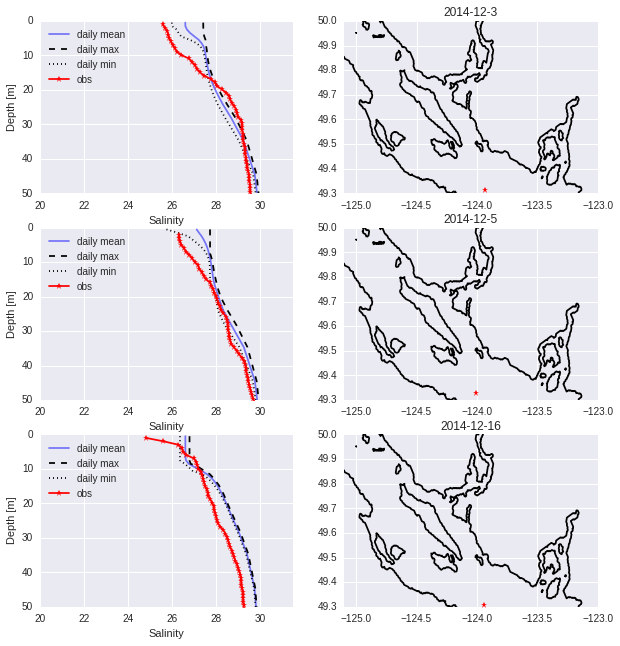

In [16]:
month = 12
fig=comparisons.compare_cast_hourly(month,2014,'Salinity',data_SOGN,paths['nowcast'],zmax=zmax,vmin=20,vmax=31.5,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

##Strait of Juan de Fuca

In [17]:
lon_min=-125
lon_max=-123
lat_min=48
lat_max=48.5
data_JDF  = comparisons.isolate_region(data_fall,lon_min, lon_max, lat_min, lat_max)

No model data for 16/10
No model data for 16/10
No model data for 16/10


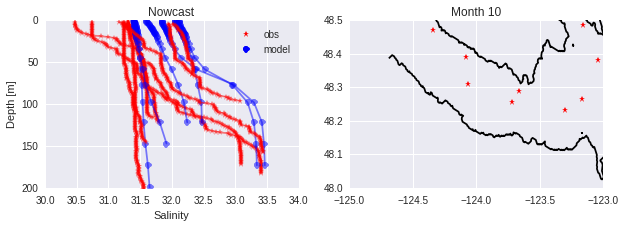

In [18]:
zmax= 200
grouped = data_JDF.groupby('Month')
model_year=2014
for month in grouped.groups.keys():
    fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_JDF,paths['nowcast'],zmax=zmax,vmin=30,
                                        vmax=34, xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

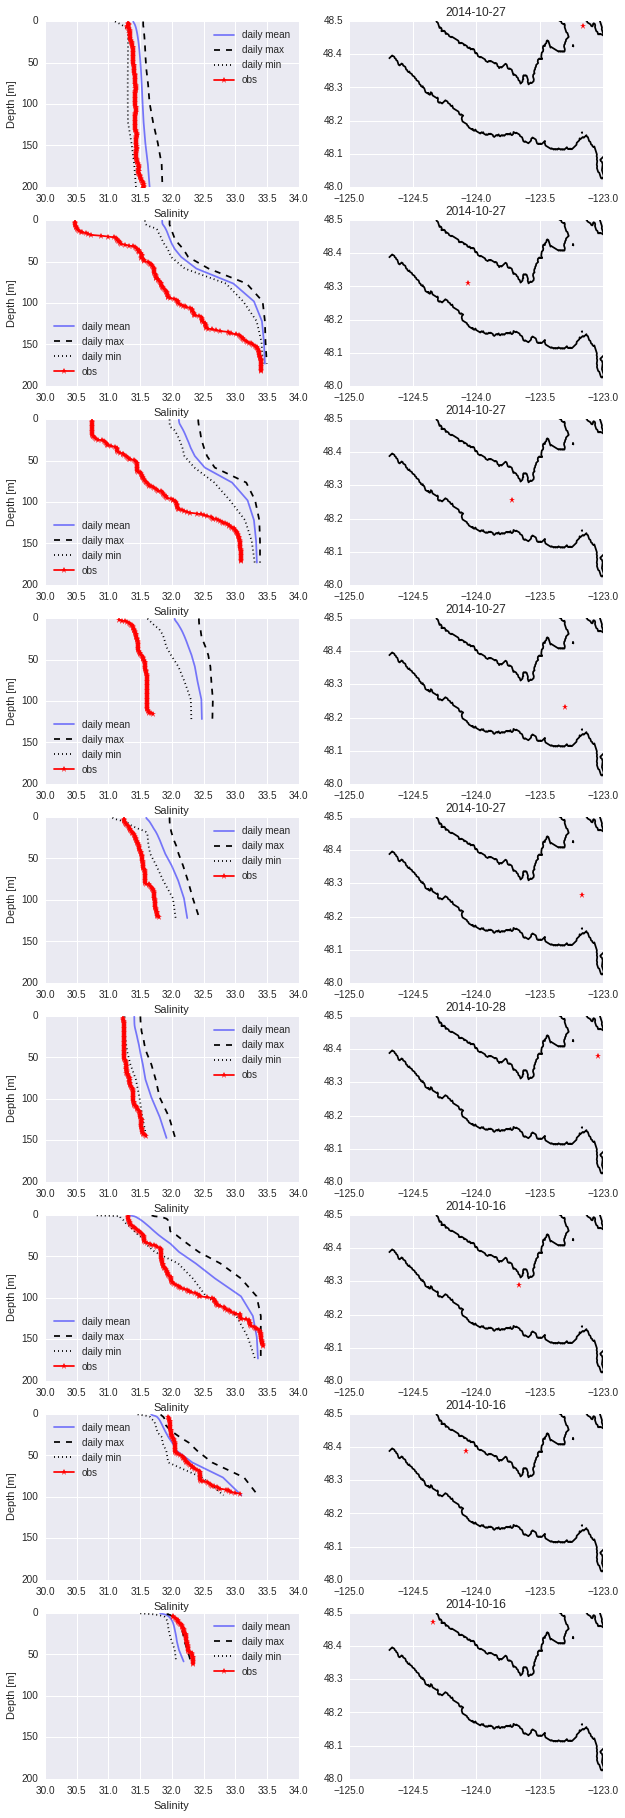

In [19]:
month = 10
fig=comparisons.compare_cast_hourly(month,2014,'Salinity',data_JDF,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

* Surface and intermediate JdF is too salty (above 150m)
* Deep is ok (below 150m) but there aren't a lot of cats that go that deep. 
* It looks like the salinity gradients are too small and too shallow in the model, especially west of -123.5.

## Haro

In [20]:
lon_min=-124.5
lon_max=-122
lat_min=48.5
lat_max=48.7
data_haro  = comparisons.isolate_region(data_fall,lon_min, lon_max, lat_min, lat_max)

No model data for 26/10


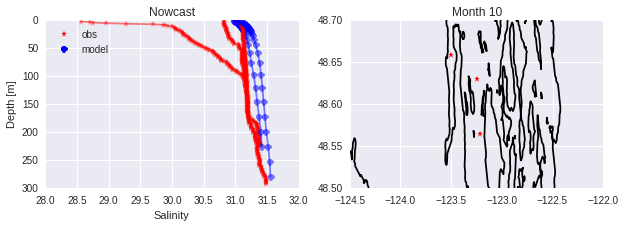

In [21]:
zmax= 300
grouped = data_haro.groupby('Month')
model_year=2014
for month in grouped.groups.keys():
    fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_haro,paths['nowcast'],zmax=zmax,
                                        vmin=28,vmax=32, xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)

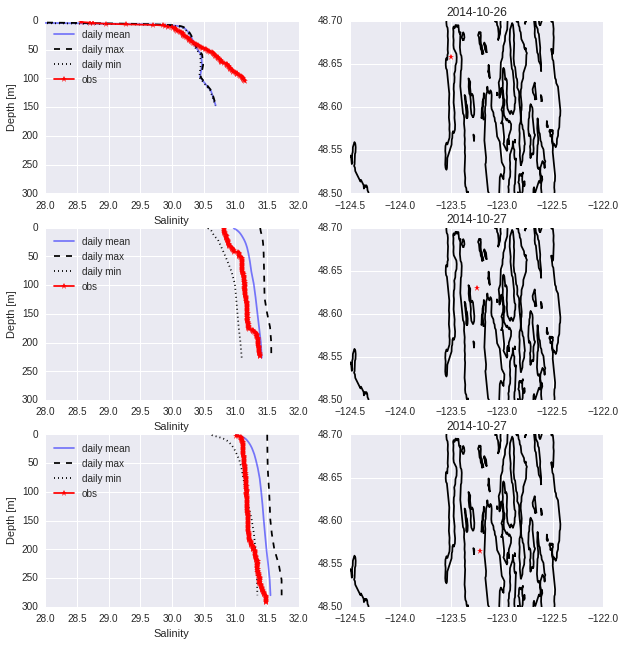

In [22]:
month = 10
fig=comparisons.compare_cast_hourly(month,2014,'Salinity',data_haro,paths['nowcast'],
                                    zmax=zmax,vmin=28,vmax=32,
                                    xmin=lon_min,xmax=lon_max,ymin=lat_min,ymax=lat_max)



* For these two casts, we look ok in Haro.